# MidTerm IoT

## Otniel Abiezer - 1301180469

Import library yang dibutuhkan

In [183]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import butter, lfilter, freqz, find_peaks

mpl.style.use(['ggplot'])

Mendapatkan Dataset, hasil pengukuran dari Phyphox

In [184]:
url = 'https://drive.google.com/uc?id=1AxN3P1ImJ9s6m2zYzBdXXh-uohttH7jN'

df_nafas = pd.read_excel(url)

Mengganti nama kolom untuk mempermudah

In [185]:
df_nafas.rename(columns={'Time (s)':'Time', 'Linear Acceleration x (m/s^2)':'SumbuX','Linear Acceleration y (m/s^2)':'SumbuY', 'Linear Acceleration z (m/s^2)' : 'SumbuZ'}, inplace=True)
df_nafas.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.054410,-0.026112,0.085231,-0.077026
1,0.069333,-0.031871,0.101178,0.010769
2,0.084256,-0.033066,0.008082,0.128082


## Nomor 3

Visualisasi hasil pengukuran langsung dari Phyphox yang memiliki 3 sumbu (X,Y,Z)

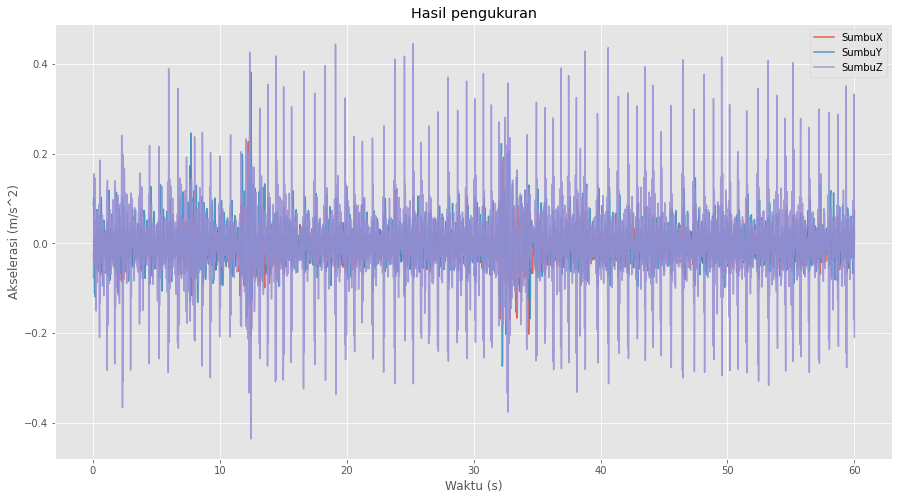

In [186]:
df_nafas.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil pengukuran")
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

## Nomor 4

Metode kedua dengan menggunakan inklinasi, yaitu menghitung besarnya sudut inklinasi saat pengukuran

In [187]:
sudutXY = np.arctan(df_nafas['SumbuX'] / (np.sqrt(df_nafas['SumbuY'] ** 2 + df_nafas['SumbuY'] ** 2)))
sudutXZ = np.arctan(df_nafas['SumbuX'] / (np.sqrt(df_nafas['SumbuZ'] ** 2 + df_nafas['SumbuZ'] ** 2)))
sudutYZ = np.arctan(df_nafas['SumbuY'] / (np.sqrt(df_nafas['SumbuZ'] ** 2 + df_nafas['SumbuZ'] ** 2)))
waktu = df_nafas['Time']

inklinasi = {'Time' : waktu, 'SudutXY' : sudutXY, 'SudutXZ' : sudutXZ, 'SudutYZ' : sudutYZ}
df_inklinasi = pd.DataFrame(inklinasi)
df_inklinasi.head(3)

,Time,SudutXY,SudutXZ,SudutYZ
0,0.054410,-0.213335,-0.235269,0.663935
1,0.069333,-0.219161,-1.125028,1.421396
2,0.084256,-1.238001,-0.180559,0.044587


Visualisasi

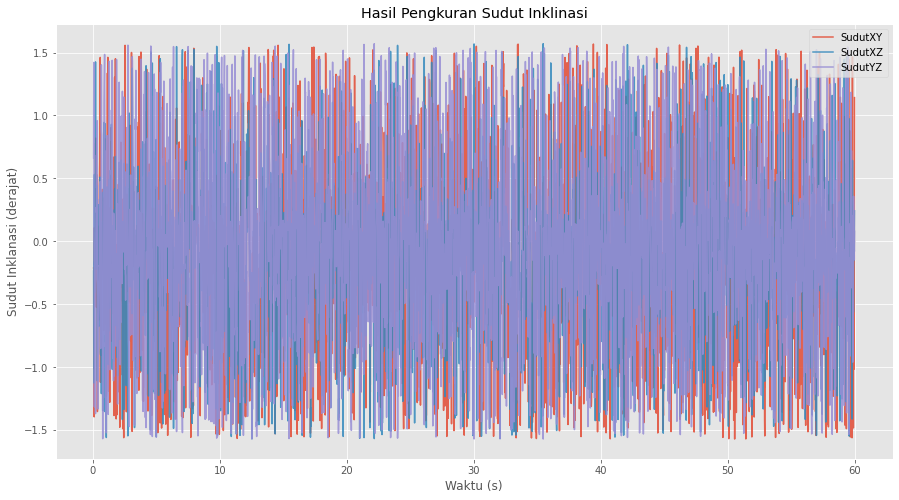

In [188]:
df_inklinasi.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil Pengkuran Sudut Inklinasi")
plt.xlabel("Waktu (s)")
plt.ylabel("Sudut Inklanasi (derajat)")
plt.show()

## Nomor 5

### LPF (Low Pass Filter) Nomor 3

In [189]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter
order = 6
fs = 100     # Frekuensi Hz
cutoff = 0.8  # Besarnya cutoff

In [190]:
# Filter data
y_x = butter_lowpass_filter(df_nafas['SumbuX'], cutoff, fs, order)
y_y = butter_lowpass_filter(df_nafas['SumbuY'], cutoff, fs, order)
y_z = butter_lowpass_filter(df_nafas['SumbuZ'], cutoff, fs, order)
t = df_nafas['Time']

filter_nomor3 = {'Time' : t, 'SumbuX' : y_x, 'SumbuY' : y_y, 'SumbuZ' : y_z}
df_filter_nomor3 = pd.DataFrame(filter_nomor3)
df_filter_nomor3.head(3)


,Time,SumbuX,SumbuY,SumbuZ
0,0.054410,-5.979246e-12,1.951685e-11,-1.763800e-11
1,0.069333,-7.788780e-11,2.535803e-10,-2.057646e-10
2,0.084256,-5.092542e-10,1.631681e-09,-1.167298e-09


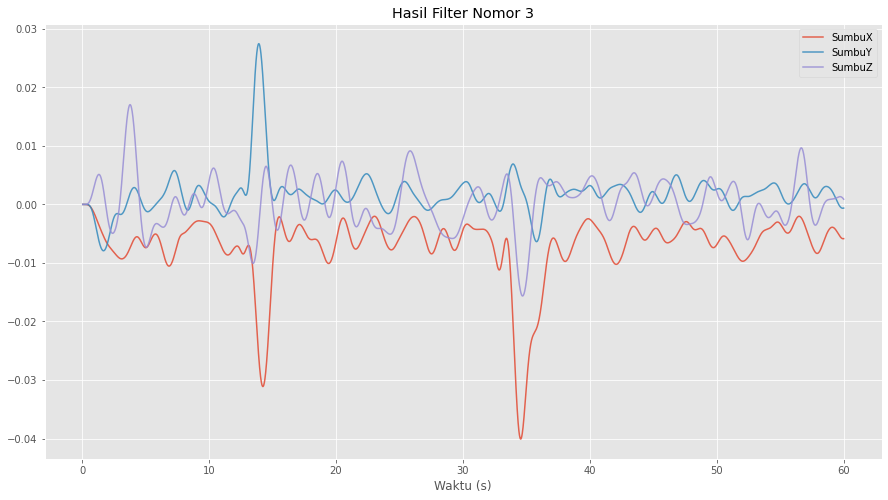

In [191]:
df_filter_nomor3.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil Filter Nomor 3")
plt.xlabel("Waktu (s)")

plt.show()

### LPF (Low Pass Filter) Nomor 4

In [192]:
# Filter data
y_xy = butter_lowpass_filter(df_inklinasi['SudutXY'], cutoff, fs, order)
y_xz = butter_lowpass_filter(df_inklinasi['SudutXZ'], cutoff, fs, order)
y_yz = butter_lowpass_filter(df_inklinasi['SudutYZ'], cutoff, fs, order)
t = df_nafas['Time']

filter_nomor4 = {'Time' : t, 'SudutXY' : y_xy, 'SudutXZ' : y_xz, 'SudutYZ' : y_yz}
df_filter_nomor4 = pd.DataFrame(filter_nomor4)
df_filter_nomor4.head(3)

,Time,SudutXY,SudutXZ,SudutYZ
0,0.054410,-4.885087e-11,-5.387334e-11,1.520322e-10
1,0.069333,-6.269081e-10,-8.936338e-10,2.120341e-09
2,0.084256,-4.270813e-09,-6.826598e-09,1.441813e-08


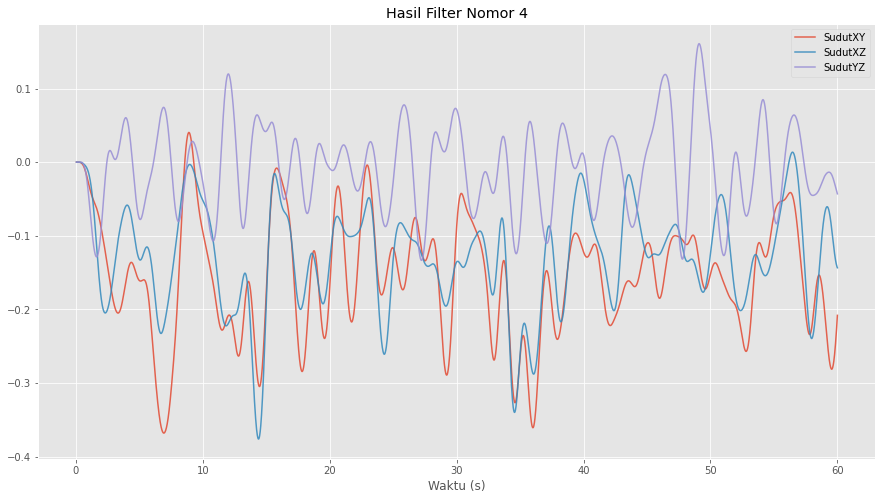

In [193]:
df_filter_nomor4.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil Filter Nomor 4")
plt.xlabel("Waktu (s)")
plt.show()

### Mendeteksi Puncak

In [194]:
peaks_x, _ = find_peaks(df_filter_nomor3['SumbuX'])
peaks_y, _ = find_peaks(df_filter_nomor3['SumbuY'])
peaks_z, _ = find_peaks(df_filter_nomor3['SumbuZ'])
peaks_xy, _ = find_peaks(df_filter_nomor4['SudutXY'])
peaks_xz, _ = find_peaks(df_filter_nomor4['SudutXZ'])
peaks_yz, _ = find_peaks(df_filter_nomor4['SudutYZ'])

print('\nTitik puncak Sumbu X pada nomor 3 : ', peaks_x)
print('\nTitik puncak Sumbu Y pada nomor 3 : ', peaks_y)
print('\nTitik puncak Sumbu Z pada nomor 3 : ', peaks_z)
print('\nTitik puncak Sudut XY pada nomor 4 : ', peaks_xy)
print('\nTitik puncak Sudut XZ pada nomor 4 : ', peaks_xz)
print('\nTitik puncak Sudut YZ pada nomor 4 : ', peaks_yz)


Titik puncak Sumbu X pada nomor 3 :  [ 286  384  614  815  875 1038 1144 1226 1375 1541 1750 1905 2029 2110
 2237 2485 2669 2909 3026 3187 3260 3386 3669 3783 3958]

Titik puncak Sumbu Y pada nomor 3 :  [  20  182  272  484  613  835  930 1053 1141 1333 1499 1699 2024 2143
 2272 2468 2594 2677 2837 3009 3135 3279 3359 3498 3649 3810 3926]

Titik puncak Sumbu Z pada nomor 3 :  [  85  250  390  490  588  691  798  968 1098 1239 1369 1495 1571 1729
 2088 2240 2418 2500 2689 2911 3066 3315 3436 3570 3661 3794 3999]

Titik puncak Sudut XY pada nomor 4 :  [ 289  355  594  806  908 1057 1254 1381 1535 1669 1789 1882 2032 2256
 2359 2482 2635 2736 2915 3018 3162 3256 3373 3605 3769 3921]

Titik puncak Sudut XZ pada nomor 4 :  [ 267  372  598  890 1046 1243 1377 1544 1710 1882 2013 2130 2247 2365
 2495 2663 2916 3051 3162 3248 3404 3586 3781 3964]

Titik puncak Sudut YZ pada nomor 4 :  [  20  177  260  460  612  802  953 1031 1155 1283 1411 1552 1730 1897
 2001 2159 2253 2395 2567 2670 2828 31

### Banyaknya Puncak

In [195]:
print("Pada Nomor 3, banyaknya puncak = ")
print(len(peaks_x), " pada sumbu X")
print(len(peaks_y), " pada sumbu Y")
print(len(peaks_z), " pada sumbu Z")

print("\nPada Nomor 4, banyaknya puncak = ")
print(len(peaks_xy), " pada sudut XY")
print(len(peaks_xz), " pada sudut XZ")
print(len(peaks_yz), " pada sudut YZ")

Pada Nomor 3, banyaknya puncak = 
25  pada sumbu X
27  pada sumbu Y
27  pada sumbu Z

Pada Nomor 4, banyaknya puncak = 
26  pada sudut XY
24  pada sudut XZ
27  pada sudut YZ


### Laju Pernafasan per Menit

Jika dihitung manual, jumlah pernafasan per menit sebanyak 11.

Untuk cara nomor 3 (direct method) memiliki rata-rata 26.3333

Untuk cara nomor 4 (inklinasi) memiliki rata-rata 25.66667


Metode yang lebih baik adalah inklinasi karena lebih mendekati nilai aktualnya